In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100
from cellpose import utils, io
import glob
import cv2
import tifffile

In [15]:
data_path = "/Users/johannes.wirth/Nextcloud/cellpose/".replace("/","\\")
file_ending = ".tif"

files = glob.glob(os.path.join(data_path, "*" + file_ending))

In [16]:
files

['\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_bcat.tif',
 '\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_bf.tif',
 '\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_dapi.tif',
 '\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_phalloidin.tif']

In [33]:
imgs = tifffile.imread(files)

In [34]:
imgs.shape

(4, 1024, 1344)

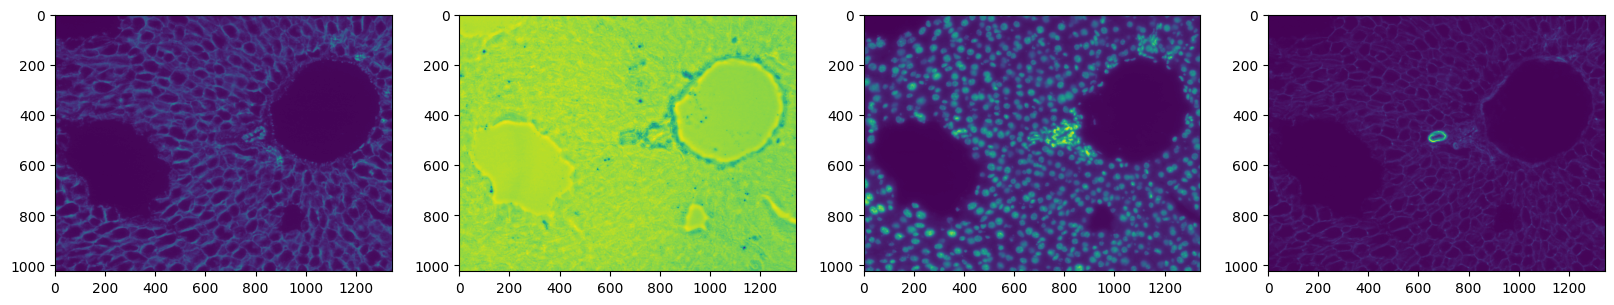

In [48]:
fig, axs = plt.subplots(1, len(imgs), figsize=(5 * len(imgs), 5))

for idx, im in enumerate(imgs):
    axs[idx].imshow(im)
    
plt.show()

In [36]:
# choose by pattern
pattern = "phalloidin"
file = [elem for elem in files if pattern in elem]

In [37]:
file

['\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_phalloidin.tif']

In [40]:
img = io.imread(file[0])

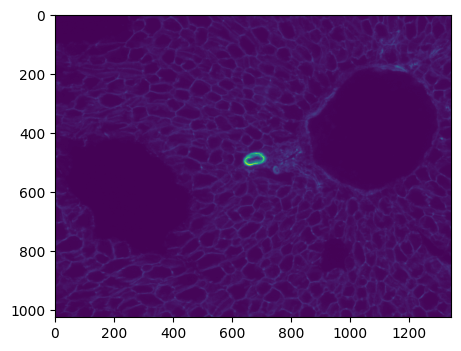

In [47]:
plt.imshow(img)

In [50]:
files

['\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_bcat.tif',
 '\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_bf.tif',
 '\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_dapi.tif',
 '\\Users\\johannes.wirth\\Nextcloud\\cellpose\\37_25_rabbit_10X-06_phalloidin.tif']

In [ ]:
# RUN CELLPOSE
from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[0,0]] * 4

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs, diameter=None, flow_threshold=None, channels=channels)

In [53]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
#channels = [[2,3], [0,0], [0,0]]
channels = [[0, 0]] * 4

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# or in a loop
for chan, filename in zip(channels, files):
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)

    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

    # save results as png
    io.save_to_png(img, masks, flows, filename)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
computing styles from images
time spent: running network 3.43s; flow+mask computation 2.88
estimated cell diameters for 1 image(s) in 18.97 sec
>>> diameter(s) =  [51.32575005]
time spent: running network 18.30s; flow+mask computation 7.46
estimated masks for 1 image(s) in 25.81 sec
>>>> TOTAL TIME 44.77 sec
processing 1 image(s)
computing styles from images
time spent: running network 10.58s; flow+mask computation 3.46
estimated cell diameters for 1 image(s) in 26.50 sec
>>> diameter(s) =  [33.55790193]
time spent: running network 40.94s; flow+mask computation 2.88
estimated masks for 1 image(s) in 43.87 sec
>>>> TOTAL TIME 70.37 sec
processing 1 image(s)
computing styles from images
time spent: running network 17.34s; flow+mask computation 12.43
estimated cell diameters for 1 image(s) 

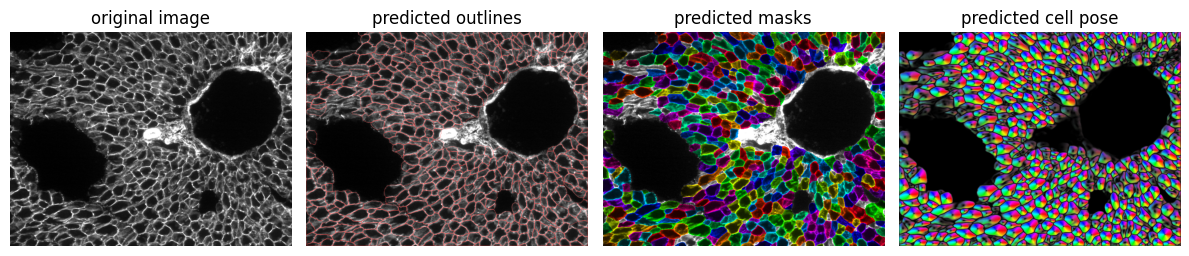

In [54]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

## Reload output files and view results

In [62]:
seg_files = glob.glob(os.path.join(data_path, "*.npy"))

segs = [np.load(file, allow_pickle=True).item() for file in seg_files]

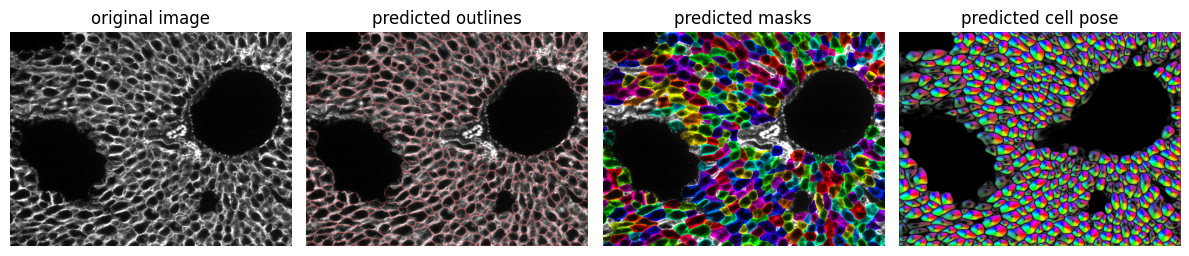

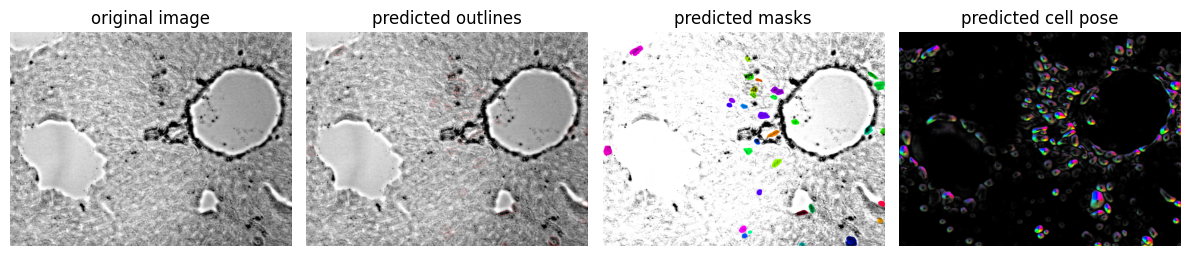

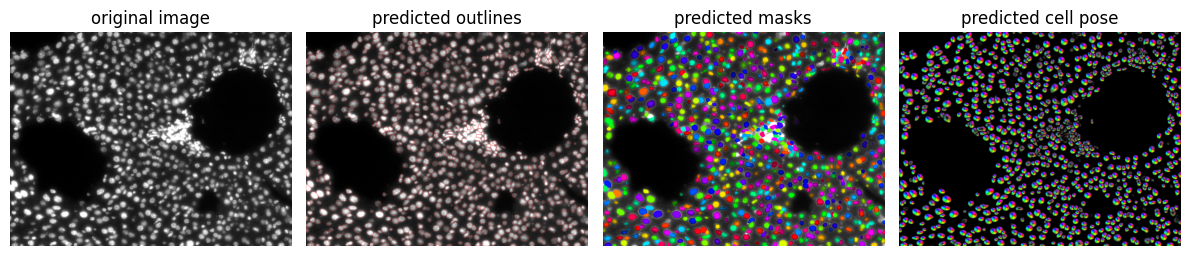

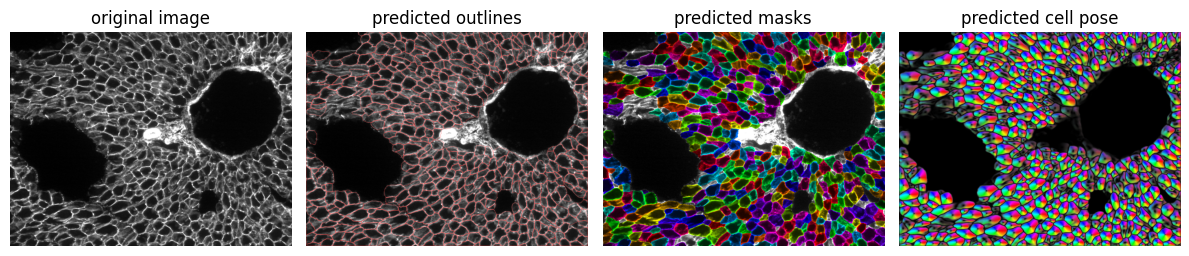

In [82]:
# DISPLAY RESULTS
from cellpose import plot

for i in range(len(imgs)):
    img = imgs[i]
    masks = segs[i]['masks']
    flows = segs[i]['flows'][0]
    chan = channels[i]
    
    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
    plt.tight_layout()
    plt.show()

## Transform multiple grayscale images into RGB

In [164]:
def normalize_to_8bit(data, lower=0, upper=None, bit_type=np.uint8):
    if lower is None:
        lower = np.min(data)
        
    if upper is None:
        upper = np.max(data)
        
    return ((data - lower) / (upper - lower) * 255).astype(bit_type)

def multi_grayscale_to_rgb(r=None, g=None, b=None, bit_type="8bit"):
    '''
    Function to transform multiple grayscale images into a rgb image.
    '''
    if bit_type is "8bit":
        bit_type = np.uint8
    elif bit_type is "16bit":
        bit_type = np.uint16
    else:
        print("Unknown bit type.")
        return
    
    if r is not None:
        shape = r.shape
    elif g is not None:
        shape = g.shape
    elif b is not None:
        shape = b.shape
    else:
        print("All channels empty.")
        return
        
    if r is None:
        r = np.zeros(shape, dtype=bit_type)
    else:
        r = normalize_to_8bit(r, bit_type=bit_type)
        
    if g is None:
        g = np.zeros(shape, dtype=bit_type)
    else:
        g = normalize_to_8bit(g, bit_type=bit_type)
        
    if b is None:
        b = np.zeros(shape, dtype=bit_type)
    else:
        b = normalize_to_8bit(b, bit_type=bit_type)
    
    rgb = cv2.merge((r, g, b))
    
    return rgb

In [170]:
rgb = multi_grayscale_to_rgb(b=imgs[2], g=imgs[3])

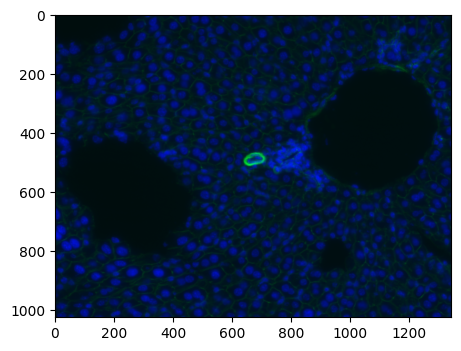

In [171]:
plt.imshow(rgb)

In [106]:
b = imgs[2]
g = imgs[3]

merged = cv2.merge((g, b))

In [107]:
rgb = plot.image_to_rgb(merged)

In [161]:
b_norm = normalize_to_8bit(b)
g_norm = normalize_to_8bit(g)


In [151]:
b_norm.shape

(1024, 1344)

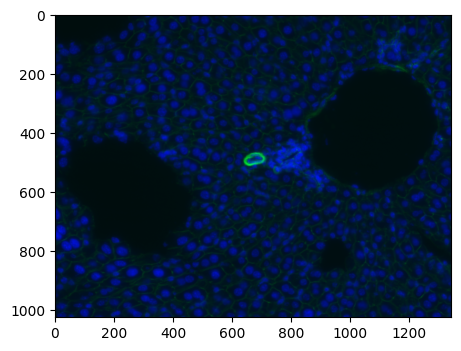

In [159]:
plt.imshow(rgb)

# Explore .npy file

In [123]:
image_file = os.path.join(data_path, "img05_seg.npy")

In [124]:
seg = np.load(image_file, allow_pickle=True).item()

In [125]:
seg.keys()

dict_keys(['outlines', 'masks', 'chan_choose', 'ismanual', 'filename', 'flows', 'est_diam'])

## Explore masks

In [138]:
seg['masks']

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 204, ...,   0,   0,   0],
       [  0,   0, 204, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

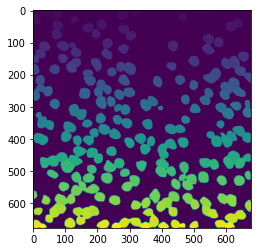

In [137]:
plt.imshow(seg['masks'])

## Explore flows

In [126]:
flows = seg['flows']
for i in range(len(flows)):
    print(flows[i].shape)

(1, 677, 677, 3)
(1, 677, 677)
(1, 664, 664, 3)
(2, 664, 664)
(3, 664, 664)


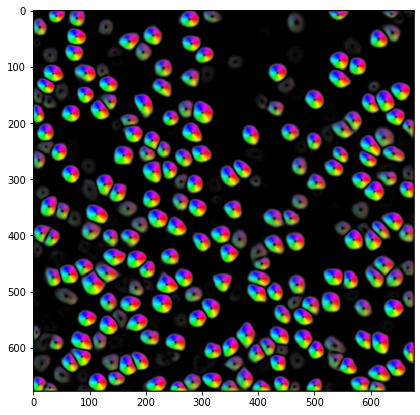

In [129]:
entry = flows[0]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs.imshow(elem)
    
plt.show()

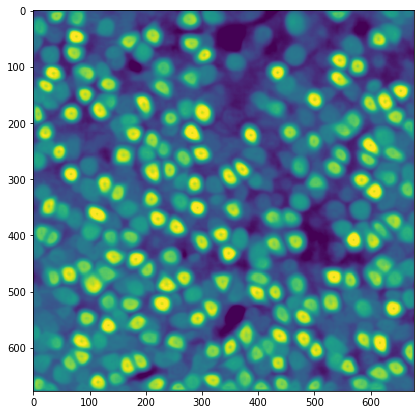

In [130]:
entry = flows[1]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs.imshow(elem)
    
plt.show()

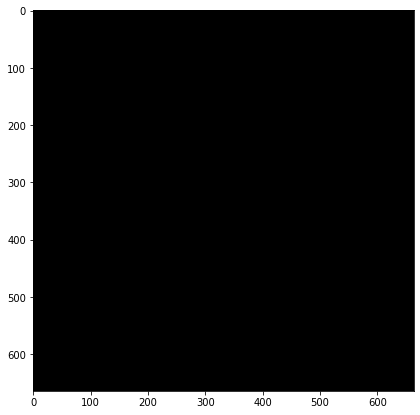

In [131]:
entry = flows[2]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs.imshow(elem)
    
plt.show()

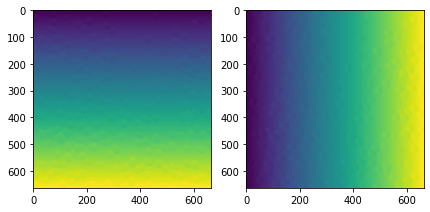

In [132]:
entry = flows[3]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs[idx].imshow(elem)
    
plt.show()

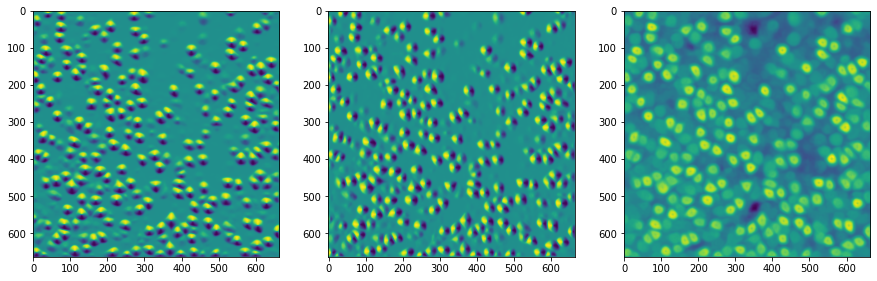

In [133]:
entry = flows[4]

fig, axs = plt.subplots(1, len(entry), figsize=(15,5))

for idx, elem in enumerate(entry):
    axs[idx].imshow(elem)
    
plt.show()